# **Advanced Machine Learning Methods**
## **Maestría en Inteligencia Artificial Aplicada**
### **Dr. José Antonio Cantoral Ceballos**
### **Tecnológico de Monterrey**
## **Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset**

---

### Team 7

- Rodrigo Robledo Castillo - A01797582
- Pedro David Juarez Leyva - A01797041
- Emilio Contreras Téllez - A01111353
- Omar Aguilar Macedo - A0179707

## Table of Contents
1. [ Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset](#activity1b)
    1. [Import images](#import-images)
    2. [Split into validation and test sets](#split)
    3. [Output classes reference](#output-c)
    4. [Normalize Function](#norm-fn)
    5. [Plot Samples](#plot-samples)
    6. [Equations for our model](#equations)
    7. [Additional Functions](#additional)
    8. [Custom Linear, ReLU y Sequential classes](#classes)
    9. [Training Loop](#training)
    10. [Test model on Random data from set](#test)
2. [Architecture](#arch)
    1. [Neural Network Architecture](#nnarch)
    2. [Weight Initialization](#weight)
    3. [Output Layer and Loss Function](#output)
    4. [Data Normalization](#norm)
    5. [Hyperparameter Selection](#hyper)
    6. [Comparison with MNIST](#comparison-mnist)
    6. [Results](#results)
3. [Conclusion](#conclusion)


# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset <a name="activity1b" ></a>

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [ ]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

# %load_ext autoreload
# %autoreload 2
#################################

%matplotlib inline

# reuse existing train_test_split functionality
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Unzip Utils

import zipfile

def unzip_file(zip_filename, extract_dir):
    """
    Extracts all contents from a zip file to a specified directory.
    If the directory doesn't exist, it will be created.
    """
    # Create the destination directory if it doesn't exist
    os.makedirs(extract_dir, exist_ok=True)

    # Open the zip file in read mode ('r') using a context manager
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        # Extract all the contents into the specified directory
        zip_ref.extractall(extract_dir)
    print(f"Extracted all files from {zip_filename} to {extract_dir}")

In [ ]:
# Extract asl data from zip file
unzip_file('/content/drive/MyDrive/TC5033_MaaM/semana_02/asl_data.zip', './')

Extracted all files from /content/drive/MyDrive/TC5033_MaaM/semana_02/asl_data.zip to ./


In [ ]:
# @title Load Data
DATA_PATH = '/content/asl_data'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
valid_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,9,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


### Import Images <a name="import-images" />

In [ ]:
# get labels and data for train and validation data sets
# validation will be split into test and validation in a later step
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])

del train_df['label']
del valid_df['label']

x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

### Split into validation and test sets <a name="split" />

In [ ]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Using predefined `train_test_split` rather than calculate percentage
    manually and doing slices on python.
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    '''
    return train_test_split(x, y, test_size=pct, shuffle=shuffle, random_state=42)
    # X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct, shuffle=shuffle, random_state=42)
    # return X_train, y_train, X_test, y_test


In [ ]:
# x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)
# Split original validation set into test and validation
x_val, x_test, y_val, y_test = split_val_test(x_val, y_val)

### Output classes reference <a name="output-c" />

In [ ]:
# Create an alphabet that will represent the class of each letter
# in the dataset 0 is a, 1 is b, etc. 'j' and 'z' are removed given
# those cannot be represented in a static image

alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


In [ ]:
# Check if all sets contains all classes
print('unique values on datasets')
print(f'y_train {np.unique(y_train)}')
print(f'y_val   {np.unique(y_val)}')
print(f'y_test  {np.unique(y_test)}')

unique values on datasets
y_train [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
y_val   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
y_test  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


### Normalize <a name="norm-fn" />

In [ ]:
# Z-score normalization (mean ~ 0 & std ~ 1)
def normalize(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std

In [ ]:
x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalize(x_mean, x_std, x_train)
x_val = normalize(x_mean, x_std, x_val)
x_test = normalize(x_mean, x_std, x_test)

In [ ]:
x_train.mean(), x_train.std()

(np.float32(3.6268384e-06), np.float32(0.99999946))

In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((27455, 784), (27455,), (3586, 784), (3586,), (3586, 784), (3586,))

### Plot Samples <a name="plot-samples" />

In [ ]:
# Helper function to plot a sign
# reshapes the image to be 28x28 from a 1D array of 784
def plot_sign(image):
    plt.figure(figsize=(2,2))
    plt.imshow(image.reshape(28, 28), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

Showing sign for: d(3)


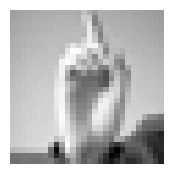

In [ ]:
rnd_idx = np.random.randint(len(y_test))
rnd_label = y_test[rnd_idx]#[0]
alphabet_label = alphabet[rnd_label]
print(f'Showing sign for: {alphabet_label}({rnd_label})')
plot_sign(x_test[rnd_idx])

### Equations for our model <a name="equations" />


1. $$z^1 = W^1 X + b^1$$

2. $$a^1 = ReLU(z^1) $$

3. $$z^2 = W^2 a^1 + b^2$$

4. $$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


5. $$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


6. $$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Aditional functions <a name="additional" />

#### Mini batches

In [ ]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    split the set `x` and its labels `y` in batches of size `mb_size`

    Parameters
    ----------
      x: values of the image as a 1D array
      y: label corresponding to the image
    '''
    assert x.shape[0] == y.shape[0], 'samples count do not match'
    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))


In [ ]:
# Test minibatches
mb_size = 4
generator = create_minibatches(mb_size, x_train, y_train, True)
next(generator)

(array([[-0.17000026, -0.12899104, -0.10848644, ...,  0.05555041,
          0.03504581, -0.00596341],
        [ 0.30160567,  0.3221103 ,  0.36311948, ...,  0.7732116 ,
          0.7322024 ,  0.7116978 ],
        [ 0.752707  ,  0.7937162 ,  0.8142208 , ...,  0.7322024 ,
          0.93724847,  1.429359  ],
        [ 0.3836241 ,  0.42463332,  0.44513792, ..., -1.1952305 ,
         -1.5438088 , -2.0769286 ]], dtype=float32),
 array([16, 15, 20,  1]))

## Custom Linear, ReLU y Sequential classes <a name="classes" />

### Linear Class

In [ ]:
# Make np_tensor class behave like a numpy array
class np_tensor(np.ndarray): pass

In [ ]:
# Defines Linear class to represent a fully connected layer
class Linear():
  def __init__(self, input_size, output_size) -> None:
    '''
    Initialize layer using Kaiming He
    '''
    self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
    self.b = (np.zeros((output_size, 1))).view(np_tensor)

  # Forward Pass operation WX + b
  def __call__(self, X):
    # Equation 1
    Z = self.W @ X + self.b
    return Z
  # Backward Pass operation to calculate gradients
  def backward(self, X, Z):
    X.grad = self.W.T @ Z.grad
    self.W.grad = Z.grad @ X.T
    self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### ReLU Class

In [ ]:
class ReLU():
  # Implements the Rectified Linear Unit (ReLU) activation function.
  # ReLU outputs the input directly if it is positive, otherwise, it outputs zero.
  def __call__(self, I):
    # Forward pass for ReLU. Applies element-wise max(0, Z).
    return np.maximum(I, 0)
  def backward(self, Z, A):
    # Backward pass for ReLU. Computes the gradient with respect to Z.
    # The gradient is 1 for positive inputs (Z > 0) and 0 for non-positive inputs
    Z.grad = A.grad * (Z > 0) # Set gradient to 0 where input was <= 0


### Sequential Class

In [ ]:
class SequentialLayers():
  # A class to sequentially add layer objects
  def __init__(self, layers) -> None:
    self.layers = layers
    self.x = None # Stores the input to the current layer during forward pass
    self.outputs = {} # Dictionary to store intermediate outputs of each layer for backward pass
  def __call__(self, X):
    # Performs the forward pass through all layers in sequence.
    self.x = X
    self.outputs['l0'] = self.x # Store initial input as output of 'layer 0'
    # skip first layer as is already added
    for i, layer in enumerate(self.layers, 1):
      self.x = layer(self.x) # Pass input through the current layer
      self.outputs[f'l{i}'] = self.x # Store the output of the current layer
    return self.x
  def backward(self):
    # Performs the backward pass through all layers in reverse order.
    # It uses the stored outputs from the forward pass to compute gradients
    for i in reversed(range(len(self.layers))):
      # Call the backward method of each layer
      self.layers[i].backward(self.outputs[f'l{i}'], self.outputs[f'l{i+1}'])
  def update(self, learning_rate = 1e-3):
    # Updates the weights and biases of layers using gradients
    for layer in self.layers:
      # Only update parameters for layers that have them
      if isinstance(layer, ReLU): continue
      layer.W = layer.W - learning_rate * layer.W.grad
      layer.b = layer.b - learning_rate * layer.b.grad
  def predict(self, X):
    # Perform forward pass and return the index of the maximum score
    return np.argmax(self(X), axis=0)

### Cost Function

In [ ]:

def softmax_x_entropy(x, y):
  '''
    Computes the Softmax activation followed by the Cross-Entropy loss
    in a single, numerically stable operation.

    Parameters
    ----------
    x : Logits output from the final linear layer of the network.
        Shape: (num_classes, batch_size)

        These are raw scores (not probabilities).

    y : Ground-truth labels.
        Expected shape: (batch_size,) or (batch_size, 1),
        containing integer class indices in the range [0, num_classes - 1].
  '''
  # Number of samples in the batch
  batch_size = x.shape[1]

  # Softmax (numerically stable)
  # Subtract max logit per sample to prevent exponential overflow
  x_stable = x - np.max(x, axis=0, keepdims=True)
  # Equation 4
  exp_scores = np.exp(x_stable)
  probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)

  # Cross Entropy Loss
  # Cost, Equation 6
  # Extract probablities corresponding
  y_idx = y.squeeze()
  y_hat = probs[y_idx, np.arange(batch_size)]
  # Add epsilon to avoid log(0)
  cost = -np.mean(np.log(y_hat + 1e-12))

  # Gradient
  # dL/dlogits = props - y_one_hot
  probs[y_idx, np.arange(batch_size)] -= 1

  # Store gradient directly in logits np_tensor
  x.grad = probs / batch_size

  return probs, cost

### Training Loop <a name="training" />

### Create your model and train it

In [ ]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            # do forward of NN
            scores = model(x.T.view(np_tensor))
            # calculate loss/cost
            _, cost = softmax_x_entropy(scores, y)
            # update gradients
            model.backward()
            # update weights and bias
            model.update(learning_rate)
        print(f'epoch: {epoch+1} - cost: {cost}, accuracy: {accuracy(x_val, y_val, mb_size, model)}')


In [ ]:
# Return the accuracy of the model
def accuracy(x, y, mb_size, model):
    '''
        Calculates the accuracy of the model on a given dataset.
    '''
    correct = 0
    total = 0
    # Iterate through the data in mini-batches to make predictions
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        # Perform forward pass to get scores
        pred = model(x.T.view(np_tensor))
        # Compare predictions with true labels
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        # Add up for all processed samples
        total += pred.shape[1]
    # Calculate accuracy
    return correct/total

In [ ]:
mb_size = 64
learning_rate = 1e-2
epochs = 25

model = SequentialLayers([
    Linear(784, 256),
    ReLU(),
    Linear(256, 128),
    ReLU(),
    Linear(128, 24)
])

In [ ]:
train(model, epochs, mb_size, learning_rate)

epoch: 1 - cost: 0.7230269161377494, accuracy: 0.611266034578918
epoch: 2 - cost: 0.4025257517198088, accuracy: 0.6949247071946458
epoch: 3 - cost: 0.1228926297891428, accuracy: 0.7152816508644729
epoch: 4 - cost: 0.08482697617718317, accuracy: 0.7228109313998885
epoch: 5 - cost: 0.0500254701075289, accuracy: 0.7278304517568321
epoch: 6 - cost: 0.029002781718142325, accuracy: 0.7292247629670943
epoch: 7 - cost: 0.044241425336060264, accuracy: 0.7353597322922476
epoch: 8 - cost: 0.02580614098867085, accuracy: 0.7392638036809815
epoch: 9 - cost: 0.0241964862883796, accuracy: 0.7409369771332962
epoch: 10 - cost: 0.02679013212960242, accuracy: 0.7426101505856108
epoch: 11 - cost: 0.015313975322238476, accuracy: 0.7445621862799777
epoch: 12 - cost: 0.01680372071914282, accuracy: 0.7445621862799777
epoch: 13 - cost: 0.01782284726951151, accuracy: 0.7476296709425544
epoch: 14 - cost: 0.011457020217111633, accuracy: 0.747350808700502
epoch: 15 - cost: 0.012658839986895846, accuracy: 0.74986056

In [ ]:
print(accuracy(x_test, y_test, mb_size, model))

0.7774679308421639


### Test your model on Random data from your test set <a name="test" />

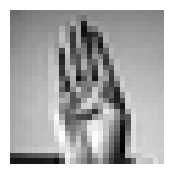

el valor predicho es: b el valor real es:b


In [ ]:
idx = np.random.randint(len(y_test))
plot_sign(x_test[idx])
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'el valor predicho es: {alphabet[pred[0]]} el valor real es:{alphabet[y_test[idx]]}')

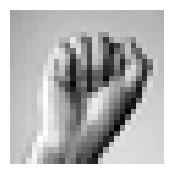

el valor predicho es: a el valor real es:a


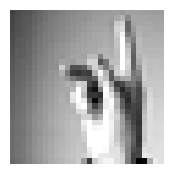

el valor predicho es: k el valor real es:k


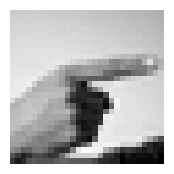

el valor predicho es: g el valor real es:g


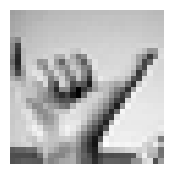

el valor predicho es: y el valor real es:y


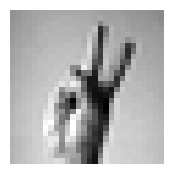

el valor predicho es: t el valor real es:v


In [ ]:
random_idxs = np.random.choice(range(len(y_test)), size=5, replace=False)
for idx in random_idxs:
    plot_sign(x_test[idx])
    pred = model.predict(x_test[idx].reshape(-1, 1))
    print(f'el valor predicho es: {alphabet[pred[0]]} el valor real es:{alphabet[y_test[idx]]}')

In [ ]:
# @title Dummy Grid Search

def print_progress(epoch, epochs):
    progress = (epoch + 1) / epochs
    print(f"\r  Progress: {(progress*100):.2f}%", end="", flush=True)

def build_model(layer_sizes):
    layers = []
    for i in range(len(layer_sizes) - 1):
        layers.append(Linear(layer_sizes[i], layer_sizes[i+1]))
        # Appends ReLU between layers
        if i < len(layer_sizes) - 2:
            layers.append(ReLU())
    return SequentialLayers(layers)

# Brute Force
def train_and_eval_bf(model, epochs, batch_size, learning_rate):
    for epoch in range(epochs):
        print_progress(epoch, epochs)
        for x, y in create_minibatches(batch_size, x_train, y_train):
            scores = model(x.T.view(np_tensor))
            _, cost = softmax_x_entropy(scores, y)
            model.backward()
            model.update(learning_rate)
    acc = accuracy(x_val, y_val, batch_size, model)
    return acc

# Early Stop
def train_and_eval_es(model, epochs, batch_size, learning_rate, patience=3):
    best_acc = 0
    no_improve = 0

    for epoch in range(epochs):
        print_progress(epoch, epochs)
        for x, y in create_minibatches(batch_size, x_train, y_train):
            scores = model(x.T.view(np_tensor))
            _, _ = softmax_x_entropy(scores, y)
            model.backward()
            model.update(learning_rate)

        acc = accuracy(x_val, y_val, batch_size, model)

        if acc > best_acc:
            best_acc = acc
            no_improve = 0
        else:
            no_improve += 1

        if no_improve >= patience:
            break

    return best_acc

# Use early stop training
train_and_eval = train_and_eval_es

In [ ]:
import itertools

param_grid = {
    "learning_rate": [5e-3, 1e-2],
    "batch_size": [64, 128],
    "epochs": [25],
    "layers": [
        [784, 128, 24],
        [784, 256, 128, 24],
        [784, 512, 256, 24],
    ]
}

results = []

# Iterate through all the parameters and validate models
for lr, bs, ep, layers in itertools.product(
    param_grid["learning_rate"],
    param_grid["batch_size"],
    param_grid["epochs"],
    param_grid["layers"]
):
    print(f"LR={lr}, BS={bs}, EPOCHS={ep}, LAYERS={layers}")

    model = build_model(layers)
    acc = train_and_eval(model, ep, bs, lr)

    results.append({
        "learning_rate": lr,
        "batch_size": bs,
        "epochs": ep,
        "layers": layers,
        "val_accuracy": acc
    })

    print(f"\r  val acc = {acc:.4f}\n")

LR=0.005, BS=64, EPOCHS=25, LAYERS=[784, 128, 24]
  val acc = 0.7563

LR=0.005, BS=64, EPOCHS=25, LAYERS=[784, 256, 128, 24]
  val acc = 0.7554

LR=0.005, BS=64, EPOCHS=25, LAYERS=[784, 512, 256, 24]
  val acc = 0.7658

LR=0.005, BS=128, EPOCHS=25, LAYERS=[784, 128, 24]
  val acc = 0.7373

LR=0.005, BS=128, EPOCHS=25, LAYERS=[784, 256, 128, 24]
  val acc = 0.7677

LR=0.005, BS=128, EPOCHS=25, LAYERS=[784, 512, 256, 24]
  val acc = 0.7624

LR=0.01, BS=64, EPOCHS=25, LAYERS=[784, 128, 24]
  val acc = 0.7379

LR=0.01, BS=64, EPOCHS=25, LAYERS=[784, 256, 128, 24]
  val acc = 0.7819

LR=0.01, BS=64, EPOCHS=25, LAYERS=[784, 512, 256, 24]
  val acc = 0.7794

LR=0.01, BS=128, EPOCHS=25, LAYERS=[784, 128, 24]
  val acc = 0.7546

LR=0.01, BS=128, EPOCHS=25, LAYERS=[784, 256, 128, 24]
  val acc = 0.7702

LR=0.01, BS=128, EPOCHS=25, LAYERS=[784, 512, 256, 24]
  val acc = 0.7761



In [ ]:
# Print results from best to worst
sorted(results, key=lambda x: x["val_accuracy"], reverse=True)

[{'learning_rate': 0.01,
  'batch_size': 64,
  'epochs': 25,
  'layers': [784, 256, 128, 24],
  'val_accuracy': np_tensor(0.78192973)},
 {'learning_rate': 0.01,
  'batch_size': 64,
  'epochs': 25,
  'layers': [784, 512, 256, 24],
  'val_accuracy': np_tensor(0.77941997)},
 {'learning_rate': 0.01,
  'batch_size': 128,
  'epochs': 25,
  'layers': [784, 512, 256, 24],
  'val_accuracy': np_tensor(0.77607362)},
 {'learning_rate': 0.01,
  'batch_size': 128,
  'epochs': 25,
  'layers': [784, 256, 128, 24],
  'val_accuracy': np_tensor(0.77021751)},
 {'learning_rate': 0.005,
  'batch_size': 128,
  'epochs': 25,
  'layers': [784, 256, 128, 24],
  'val_accuracy': np_tensor(0.76770775)},
 {'learning_rate': 0.005,
  'batch_size': 64,
  'epochs': 25,
  'layers': [784, 512, 256, 24],
  'val_accuracy': np_tensor(0.76575572)},
 {'learning_rate': 0.005,
  'batch_size': 128,
  'epochs': 25,
  'layers': [784, 512, 256, 24],
  'val_accuracy': np_tensor(0.76240937)},
 {'learning_rate': 0.005,
  'batch_size':

# Architecture <a name="arch" />

## Neural Network Architecture <a name="nnarch" />

For the classification of hand gestures in the ASL (Sign Language MNIST) dataset, a fully connected multilayer perceptron (MLP) was employed with the following architecture:


```
784 → 256 → 128 → 24
```

where:

- `784` corresponds to the flattened input of 28×28 pixel images,
- `256` and `128` are hidden layers with ReLU activation,
- `24` is the output layer, corresponding to the letters included in the dataset (excluding J and Z).

This architecture represents a balance between model capacity and computational cost, avoiding both underfitting (models with insufficient capacity) and overfitting (excessively large networks).

The `ReLU` activation function was selected due to its computational simplicity and its ability to facilitate gradient flow during training, which is particularly relevant in manual implementations of backpropagation.

## Weigth initialization <a name="weight" />

The weights of the linear layers were initialized using `Kaiming He` initialization, which is well suited for networks employing `ReLU` activations.
This initialization helps preserve the variance of activations across layers and improves convergence during training.

## Output Layer and Loss Function <a name="output" />

The output layer produces `logits`, which are transformed using a `numerically stable Softmax` function, followed by a `categorical cross-entropy` loss function.

This combination is appropriate for multiclass classification problems and provides well-defined gradients for optimization.

NOTE: A second version of this function was made and used to try to avoid overflows at the moment of calculating soft max

## Data Normalization <a name="norm" />

The input images were normalized using feature-wise standardization (Z-score):

$x_{norm} = \frac{x - \mu}{\sigma}$

where the mean ($\mu$) and standard deviation ($\sigma$) were computed exclusively from the training set.

This normalization helped to:
- improve numerical stability,
- accelerate convergence,
- prevent features with larger scales from dominating the learning process.

## Hyperparameter Selection <a name="hyper" />

The final hyperparameters were selected through a manual grid search, evaluating different combinations of model configurations and training parameters.

The best-performing configuration was:
```python
mb_size = 64
learning_rate = 1e-2
epochs = 25
```
### Mini-batch Size

A mini-batch size of 64 provides a suitable trade-off between: gradient stability, computational efficiency, and generalization capability.

Larger batch sizes led to slower convergence in this setting, while smaller batches introduced excessive noise into the gradient updates.

### Learning Rate

A learning rate of $1\times10^{-2}$ enabled fast and stable convergence.

This value was particularly important due to the normalization of gradients by the mini-batch size, which effectively reduces their magnitude and requires an appropriately scaled learning rate to avoid excessively slow training.

### Number of Epochs

The model was trained for 25 epochs, as performance on the validation set was observed to stabilize beyond this point, with no significant gains from further training.

## Results <a name="results" />

Using this configuration, the model achieved an accuracy of approximately `~0.77` on the validation set

This result is consistent with expectations for a fully connected neural network, with no data augmentation, which was implemented manually with the help of NumPy and due it was applied to an image classification task.


The selected architecture and hyperparameters demonstrate that good performance can be achieved using a low-level implementation, provided that a grdient flow is correclty defined, and proper initialization and normalization techniques are applied, and hyperparameters are systematically tuned.

This approach enables a deep understanding of neural network internals and provides a strong foundation for the subsequent use of high-level deep learning frameworm.


# Comparison with MNIST <a name="comparison-mnist" />

The progression from MNIST followed by an extension to ASL (American Sign Language) allowed for the analysis of a neural network's behavior under two levels of task complexity while maintaining a comparable training methodology.

MNIST represents a relatively simple classification problem, characterized by:

- Ten well-separated classes.
- Low intra-class variability.
- Highly consistent visual patterns.

In this context, a fully connected neural network can achieve high accuracy with modest architectural complexity.

In contrast, the ASL dataset introduces greater structural complexity:

- Twenty-four classes instead of ten.
- Gestures with higher visual similarity.
- Increased intra-class variability due to subtle differences in hand orientation and shape.

These factors make the classification task inherently more challenging. Nevertheless, the proposed model achieved an accuracy close to 77%, indicating that the network successfully learned meaningful feature representations even without explicitly exploiting spatial image structure.

This comparison highlights how increasing class count and visual similarity directly impact model performance, emphasizing the importance of selecting architectures appropriate to the complexity of the problem.

# Conclusion <a name="conclusion" ></a>

This work presented the design and implementation of a multilayer neural network built entirely from scratch using NumPy, with the goal of gaining a deep understanding of supervised learning principles beyond the use of high-level frameworks.

By progressing from MNIST to the more challenging ASL dataset, it was possible to observe how increased task complexity affects model design, training behavior, and final performance. The study demonstrated that seemingly small implementation details (such as correct ReLU backpropagation, numerical stability in the softmax function), and proper gradient scaling play a critical role in successful learning.

Through systematic hyperparameter tuning using a grid search approach, the model achieved a validation accuracy of approximately `77%`, validating both the implementation and the methodology.

The use of fully connected model enabled greater transparency and conceptual clarity. This low-level approach not only reinforces theoretical understanding but also provides a strong foundation for the informed use of advanced deep learning architectures in future work.